# Machine Learning Lab 5
Naïve Bayes

**Name:** Fatima Mujahid

**Class:** BESE-10B

**CMS ID:** 289558

**Date:** March 21, 2022

# Importing modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# **Task 1 Categorical Naïve Bayes**

# Reading csv file

In [ ]:
data = pd.read_csv("play.csv", sep=";")
data.head()

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [ ]:
X = data[['weather', 'temperature']]
y = data['play']

# Preprocessing the dataset

In [ ]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
print(encoder.categories_)
print(X)

[array(['Overcast', 'Rainy', 'Sunny'], dtype=object), array(['Cool', 'Hot', 'Mild'], dtype=object)]
[[2. 1.]
 [2. 1.]
 [0. 1.]
 [1. 2.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [2. 2.]
 [2. 0.]
 [1. 2.]
 [2. 2.]
 [0. 2.]
 [0. 1.]
 [1. 2.]]


# Creating the classifier

In [ ]:
classifier_0 = CategoricalNB(alpha = 0)
classifier_0.fit(X, y)

classifier_1 = CategoricalNB(alpha = 1)
classifier_1.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


CategoricalNB(alpha=1)

# Computing posterior probability
p(play | weather = Sunny, temp = hot) 

In [ ]:
print("Prediction with smoothing parameter = 0:")
print(classifier_0.predict([[2,1]]))
print(classifier_0.predict_proba([[2,1]]))

print("\nPrediction with smoothing parameter = 1:")
print(classifier_1.predict([[2,1]]))
print(classifier_1.predict_proba([[2,1]]))

Prediction with smoothing parameter = 0:
['No']
[[0.72972973 0.27027027]]

Prediction with smoothing parameter = 1:
['No']
[[0.625 0.375]]


# **Task 2 Categorical Naïve Bayes on UCI dataset**

# Monks Problems Dataset

58 % 21 = 16

Dataset is 16_monks-problems-3.csv

# Reading csv file

In [3]:
data = pd.read_csv("16_monks-problems-3.csv", sep=";")
data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,label
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1


In [4]:
X = data.iloc[:, :-1]
y = data['label']

# Preprocessing the dataset

In [5]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
print(encoder.categories_)
print(X)

[array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.]), array([-1.,  1.])]
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]]


# Partitioning the dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Creating the classifier

In [18]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

CategoricalNB()

# Displaying accuracy

In [19]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

print("Training Accuracy is {0:0.4f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("Testing Accuracy is {0:0.4f}%".format(accuracy_score(y_test, y_pred_test)*100))

Training Accuracy is 97.3913%
Testing Accuracy is 96.5517%


# Varying the alpha value

In [20]:
train_errors = list()
test_errors = list()

for x in range(0, 51):
  classifier = CategoricalNB(alpha = x)
  classifier.fit(X_train, y_train)
  y_pred_train = classifier.predict(X_train)
  y_pred_test = classifier.predict(X_test)
  train_error = 1 - accuracy_score(y_train, y_pred_train) 
  test_error = 1 - accuracy_score(y_test, y_pred_test)
  train_errors.append(train_error)
  test_errors.append(test_error)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


# Generating plot

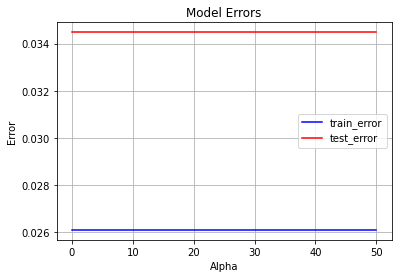

In [21]:
plt.figure()
plt.plot(train_errors, 'b')
plt.plot(test_errors, 'r')
plt.title('Model Errors')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.legend(['train_error','test_error'])
plt.grid()
plt.show()

# Best alpha value

From the graph above it is clear that any value in the range of 0 to 50 will serve as a a good alpha value for our dataset as the train and test errors are very small and remaining constant throughout. We can use alpha = 1 as it is the most commonly used value for Laplace smoothing.



# **Task 3 Gaussian Naïve Bayes**

# Reading Breast Cancer dataset

In [ ]:
np_data = datasets.load_breast_cancer()
np_data.feature_names, np_data.target_names

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'))

In [ ]:
X = np_data.data
y = np_data.target

In [ ]:
data = pd.DataFrame(data = X, columns = np_data.feature_names)
data['target'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Partitioning the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Creating the classifier

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train) 
train_error = 1 - train_accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
test_error = 1 - test_accuracy

# Displaying accuracy and errors

In [ ]:
print("TRAINING:")
print("Training Accuracy is {0:0.4f}%".format(train_accuracy*100))
print("Training Error is {0:0.4f}".format(train_error))

print("\nTESTING:")
print("Testing Accuracy is {0:0.4f}%".format(test_accuracy*100))
print("Testing Error is {0:0.4f}".format(test_error))

TRAINING:
Training Accuracy is 94.0659%
Training Error is 0.0593

TESTING:
Testing Accuracy is 93.8596%
Testing Error is 0.0614
